In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *


data = pd.read_csv('archive/star_classification.csv')[:5000]
print('Train Data Shape =',data.shape)
print('Columns =',data.columns)

data.describe()

Train Data Shape = (5000, 18)
Columns = Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.237667e+18,180.354305,22.581491,22.133677,20.700436,19.725188,19.168907,18.854327,4976.408800,301.0,3.465800,185.910800,5.893195e+18,0.607581,5234.099600,55648.460400,445.118600
std,9.029693e+12,111.785817,18.458422,2.224076,1.995250,1.811632,1.720967,1.745015,2102.420127,0.0,1.570517,142.299889,3.239526e+18,0.767468,2877.263568,1780.144097,270.345582
min,1.237646e+18,0.005528,-13.624327,12.262400,10.511390,10.068540,11.299560,10.225510,109.000000,301.0,1.000000,11.000000,3.469267e+17,-0.004136,308.000000,51662.000000,1.000000
25%,1.237661e+18,116.758693,5.915898,20.468045,19.160165,18.336197,17.909965,17.657312,3699.000000,301.0,2.000000,85.000000,3.019765e+18,0.070526,2682.000000,54506.250000,217.000000
50%,1.237665e+18,182.020132,20.721511,22.171740,21.113750,20.192430,19.488050,19.080845,4504.000000,301.0,4.000000,145.000000,6.076503e+18,0.427946,5397.000000,56009.000000,431.000000
75%,1.237679e+18,246.588157,36.289276,23.688260,22.114683,21.084935,20.472205,19.965508,7712.000000,301.0,5.000000,248.000000,8.340050e+18,0.729101,7407.250000,56776.000000,639.000000
max,1.237681e+18,359.974292,82.288657,29.199010,28.903200,27.397090,24.784710,25.333640,8157.000000,301.0,6.000000,846.000000,1.412685e+19,7.010263,12547.000000,58932.000000,1000.000000


In [2]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
from sklearn.preprocessing import LabelEncoder

data['class']=LabelEncoder().fit_transform(data['class'])
corr = data.corr()
corr['class'].sort_values()

u             -0.247809
g             -0.193551
field_ID      -0.036408
fiber_ID      -0.029387
r             -0.027681
run_ID        -0.020572
obj_ID        -0.020568
redshift      -0.012775
spec_obj_ID    0.010078
plate          0.010078
alpha          0.010845
MJD            0.026524
cam_col        0.046453
delta          0.047117
i              0.070133
z              0.125333
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [4]:
'''
from sklearn.utils import resample
df_majority = data[data.Churn==0]
df_minority = data[data.Churn==1]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=338,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
data = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data.Churn.value_counts()
'''

'\nfrom sklearn.utils import resample\ndf_majority = data[data.Churn==0]\ndf_minority = data[data.Churn==1]\n \ndf_majority_downsampled = resample(df_majority, \n                                 replace=False,    # sample without replacement\n                                 n_samples=338,     # to match minority class\n                                 random_state=123) # reproducible results\n \n# Combine minority class with downsampled majority class\ndata = pd.concat([df_majority_downsampled, df_minority])\n \n# Display new class counts\ndata.Churn.value_counts()\n'

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


features = [ 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

y=data['class']
X=data[features]
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

X, X_test, y, y_test = train_test_split(data[features],data['class'],test_size=0.2, random_state=1)


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = X.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X = pd.concat([num_X, OH_cols], axis=1)
X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

X.columns=X.columns.astype(str)
X_test.columns=X.columns.astype(str)


print('input size = ',X.shape)


input size =  (4000, 15)


In [14]:
from sklearn.model_selection import learning_curve
def plot_grid_search(cv_results, name_param):    
    params=[d[name_param] for d in cv_results['params']]
    scores=cv_results['mean_test_score']
    fig = plt.figure()
    plt.plot(params,scores)
    fig.suptitle('Grid Search Scores', fontsize=20)
    plt.xlabel(name_param)
    plt.ylabel('CV Average Score')
    plt.grid('on')
def plot_learning_curve(estimator, X, y,train_sizes=np.linspace(0.01, 1.0, 10)):
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=5,n_jobs=-1,train_sizes=train_sizes,scoring = make_scorer(accuracy_score),return_times=True)
        fit_times_means = np.mean(fit_times, axis =1)
        print('Fitting time (seconds) =' , fit_times_means[-1])
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        fig = plt.figure()
        plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
        fig.suptitle('Learning curves', fontsize=20)
        plt.xlabel('Training size')
        plt.ylabel('Accuracy')
        plt.legend(loc="best")
        plt.grid('on')
    

Cross validation Accuracy: 0.952
Testing data Accuracy: 0.952
Fitting time (seconds) = 0.04885149002075195


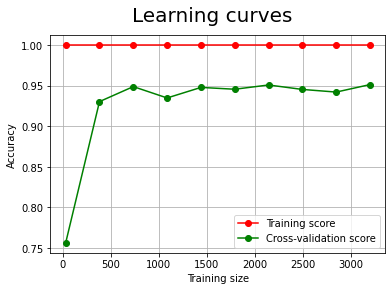

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer ,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std



DT = DecisionTreeClassifier(random_state=7)



n_scores = cross_val_score(DT, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# report performance
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

DT.fit(X,y)

pred_y=DT.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(DT, X, y)


#model1.fit(X,y)
#preds_val1=model1.predict(X_test)
#print('MSE model1 = ',accuracy_score(y_test, preds_val1))

In [16]:
'''
from sklearn.model_selection import GridSearchCV , ParameterGrid
ccp_alphas = model1.cost_complexity_pruning_path(X, y)["ccp_alphas"]
max_depth_grid_search = GridSearchCV(estimator = model1,
                                    scoring = make_scorer(accuracy_score),
                                    param_grid=ParameterGrid({"max_depth":[[k] for k in range(30)],"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
                                    n_jobs = -1)

max_depth_grid_search.fit(X, y)

model1_prunned=max_depth_grid_search.best_estimator_
print(max_depth_grid_search.best_params_)
n_scores = cross_val_score(model1_prunned, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


#plot_grid_search(max_depth_grid_search.cv_results_,'max_depth')
'''

'\nfrom sklearn.model_selection import GridSearchCV , ParameterGrid\nccp_alphas = model1.cost_complexity_pruning_path(X, y)["ccp_alphas"]\nmax_depth_grid_search = GridSearchCV(estimator = model1,\n                                    scoring = make_scorer(accuracy_score),\n                                    param_grid=ParameterGrid({"max_depth":[[k] for k in range(30)],"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),\n                                    n_jobs = -1)\n\nmax_depth_grid_search.fit(X, y)\n\nmodel1_prunned=max_depth_grid_search.best_estimator_\nprint(max_depth_grid_search.best_params_)\nn_scores = cross_val_score(model1_prunned, X, y, scoring=\'accuracy\', cv=5, n_jobs=-1)\n# report performance\nprint(\'Accuracy: %.3f (%.3f)\' % (mean(n_scores), std(n_scores)))\n\n\n#plot_grid_search(max_depth_grid_search.cv_results_,\'max_depth\')\n'

In [17]:

from sklearn.model_selection import GridSearchCV , ParameterGrid
ccp_alphas = DT.cost_complexity_pruning_path(X, y)["ccp_alphas"]
ccp_alpha_grid_search = GridSearchCV(estimator = DT,
                                    scoring = make_scorer(accuracy_score),
                                    param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
                                    cv=5,
                                    n_jobs = -1)

ccp_alpha_grid_search.fit(X, y)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fcd70d77fd0>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'ccp_alpha': 0.0009568055555555549}
Cross validation Accuracy: 0.962
Testing data Accuracy: 0.964
Fitting time (seconds) = 0.04034581184387207


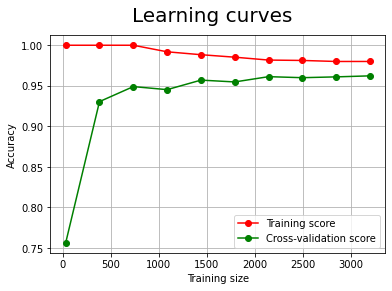

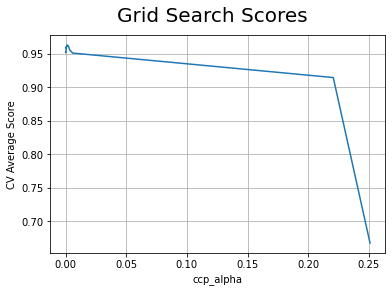

In [18]:
DT_prunned=ccp_alpha_grid_search.best_estimator_
print('Best parameter =',ccp_alpha_grid_search.best_params_)
n_scores = cross_val_score(DT_prunned, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# report performance
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

DT_prunned.fit(X,y)

pred_y=DT_prunned.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))


plot_learning_curve(DT_prunned, X, y)


plot_grid_search(ccp_alpha_grid_search.cv_results_,'ccp_alpha')

#model1_prunned.fit(X_train,y_train)
#preds_val1=model1_prunned.predict(X_test)
#print('MSE model1 = ',accuracy_score(y_test, preds_val1))

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

Fitting time (seconds) = 4.730423355102539
Cross validation Accuracy: 0.288


/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Testing data Accuracy: 0.193


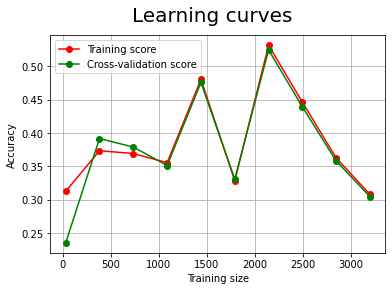

In [55]:
import tensorflow as tf
from keras import models
from keras import layers

from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

input_shape = [X.shape[1]]

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

Neural_net = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=0)

n_scores = cross_val_score(Neural_net, X, y, scoring='accuracy', cv=5, n_jobs=-1)

plot_learning_curve(Neural_net, X, y)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

Neural_net.fit(X,y)

pred_y=Neural_net.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

Cross validation Accuracy: 0.961
Testing data Accuracy: 0.970
Fitting time (seconds) = 2.5772202968597413


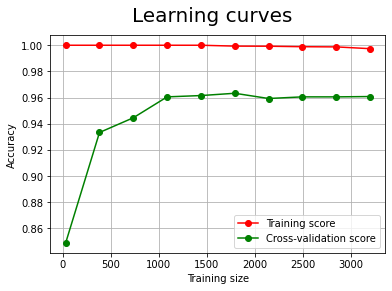

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(base_estimator=DT_prunned,learning_rate=1,random_state=7)
# evaluate the model
n_scores = cross_val_score(ada_boost, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

ada_boost.fit(X,y)

pred_y=ada_boost.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(ada_boost, X, y)

In [51]:

lr_grid_search = GridSearchCV(estimator = ada_boost,
                    scoring = make_scorer(accuracy_score),
                    param_grid=ParameterGrid({"learning_rate":[[10**-k] for k in range(0,10)]}),
                             cv=5,
                    n_jobs=-1)     

lr_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0009568055555555549,
                                                                                random_state=7),
                                          learning_rate=1, random_state=7),
             n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fcdafcbde20>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'learning_rate': 0.1}
Cross validation Accuracy: 0.966
Testing data Accuracy: 0.967
Fitting time (seconds) = 2.504756450653076


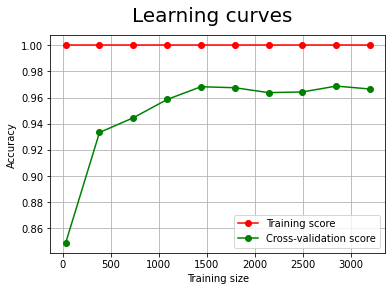

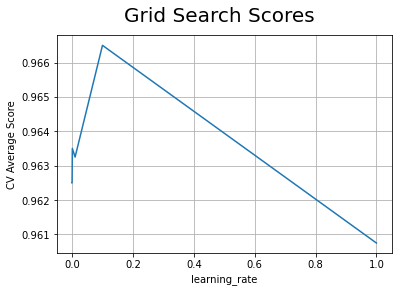

In [52]:
ada_optimal=lr_grid_search.best_estimator_
print('Best parameter =',lr_grid_search.best_params_)
n_scores = cross_val_score(ada_optimal, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

ada_optimal.fit(X,y)

pred_y=ada_optimal.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(ada_optimal, X, y)


plot_grid_search(lr_grid_search.cv_results_,'learning_rate')

Cross validation Accuracy: 0.590
Testing data Accuracy: 0.602
Fitting time (seconds) = 0.6334062099456788


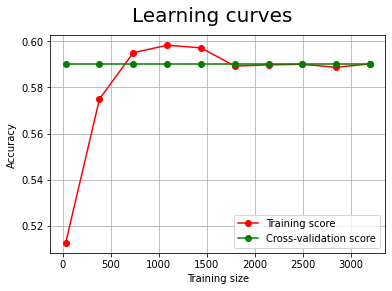

In [21]:
from sklearn import svm
svm1 = svm.SVC() 

n_scores = cross_val_score(svm1, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

svm1.fit(X,y)

pred_y=svm1.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(svm1, X, y)

Cross validation Accuracy: 0.590
Testing data Accuracy: 0.602
Fitting time (seconds) = 0.5279619216918945


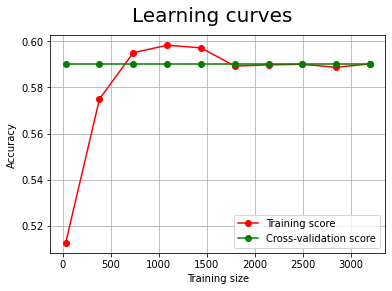

In [31]:
svm2 = svm.SVC(kernel='poly') 

n_scores = cross_val_score(svm2, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

svm2.fit(X,y)

pred_y=svm2.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(svm2, X, y)

In [33]:

degree_grid_search = GridSearchCV(estimator = svm2,
                    scoring = make_scorer(accuracy_score),
                    param_grid=ParameterGrid({"degree":[[k] for k in range(1,20)]}),
                             cv=5,
                    n_jobs=-1)     

degree_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fcdb7e8f0a0>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'degree': 1}
Cross validation Accuracy: 0.590
Testing data Accuracy: 0.602
Fitting time (seconds) = 0.49289116859436033


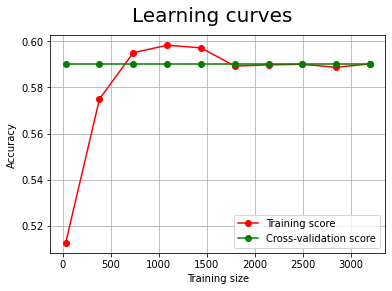

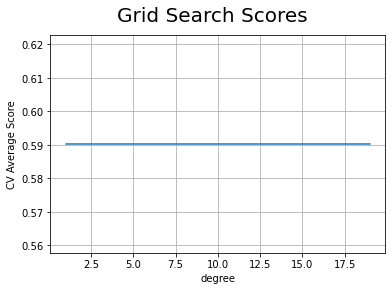

In [34]:
svm2_optimal=degree_grid_search.best_estimator_
print('Best parameter =',degree_grid_search.best_params_)
n_scores = cross_val_score(svm2_optimal, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

svm2_optimal.fit(X,y)

pred_y=svm2_optimal.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(svm2_optimal, X, y)


plot_grid_search(degree_grid_search.cv_results_,'degree')

Cross validation Accuracy: 0.680
Testing data Accuracy: 0.721
Fitting time (seconds) = 0.006816196441650391


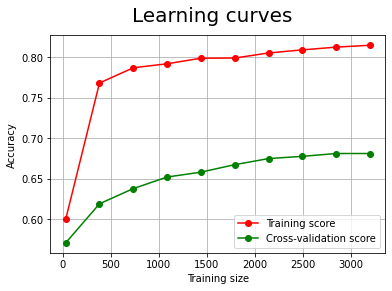

In [35]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

knn.fit(X,y)

pred_y=knn.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(knn, X, y)

In [36]:

k_grid_search = GridSearchCV(estimator = knn,
                    scoring = make_scorer(accuracy_score),
                    param_grid=ParameterGrid({"n_neighbors":[[k] for k in range(1,31)]}),
                             cv=5,
                    n_jobs=-1)        

k_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fcdb7bcd970>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'n_neighbors': 4}
Cross validation Accuracy: 0.695
Testing data Accuracy: 0.693
Fitting time (seconds) = 0.007014322280883789


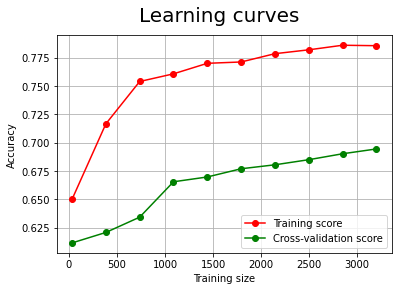

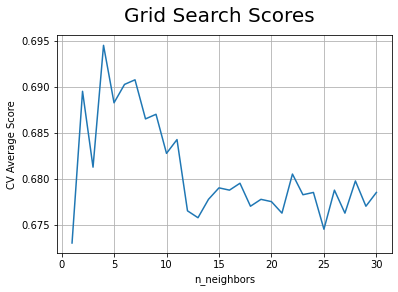

In [37]:
print('Best parameter =',k_grid_search.best_params_)

knn_optimal = k_grid_search.best_estimator_

n_scores = cross_val_score(knn_optimal, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

knn_optimal.fit(X,y)

pred_y=knn_optimal.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(knn_optimal, X, y)

plot_grid_search(k_grid_search.cv_results_,'n_neighbors')



#model2_optimal.fit(X_train,y_train)
#preds_val2=model2_optimal.predict(X_test)
#print('MSE model2 = ',accuracy_score(y_test, preds_val2))
